In [114]:
import random
import numpy as np
from math import exp,log
from matplotlib import pyplot as plt
import time
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn   
import torch.optim as optim
import pandas as pd
import tensorflow as tf 

from __future__ import print_function
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [115]:
batch_size = 12

train_data = datasets.MNIST('datasets/', train=True, download = True, transform=transforms.ToTensor())
test_data = datasets.MNIST('datasets/', train=False, download = True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

In [116]:
train_data  

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [117]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.in_dim = 28*28
        self.out_dim = 10
        
        self.fc1 = nn.Linear(self.in_dim,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,64)
        self.fc5 = nn.Linear(64, self.out_dim)
        
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax()
        
    def forward(self,x):
        
        z1 = self.fc1(x.view(-1,self.in_dim))
        a1 = self.relu(self.fc1(x.view(-1,self.in_dim)))
        #print("a1",a1)
        z2 = self.fc2(a1)
        a2 = self.relu(self.fc2(a1))
        #print("a2",a2)
        a3 = self.relu(self.fc3(a2))
        #print("a3",a3)
        a4 = self.relu(self.fc4(a3))
        #print("a4",a4)
        logit = self.fc5(a4)
        return logit, z1, a1, z2, a2, a3, a4

In [118]:
model= MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [119]:
for epoch in range(10):
    running_loss=0.0
    for i, data in enumerate(train_loader,0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs, z1, a1, z2, a2, a3, a4 = model(inputs)
        
        if(epoch == 0 and i == 0):
            print(epoch, i)

            outputss = outputs
            label = labels

            outputss = outputss.detach().numpy()
            label = label.detach().numpy()
            print(epoch, i)
        else:
          if(i % 1000 == 0) : 
            print(i)

          outputs2 = outputs.detach().numpy()
          label2 = labels.detach().numpy()
        
          label = tf.concat([label,label2],0)
          outputss = tf.concat([outputss,outputs2],0)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        
        running_loss += loss.item()
        if (i+1) % 5000 ==0:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i+1, running_loss/2000))
            running_loss = 0.0
            
print("Finished Training")

0 0
0 0
1000
2000
3000
4000
[1,  5000] loss: 3.297
0
1000
2000
3000
4000
[2,  5000] loss: 0.677
0
1000
2000
3000
4000
[3,  5000] loss: 0.384
0
1000
2000
3000
4000
[4,  5000] loss: 0.270
0
1000
2000
3000
4000
[5,  5000] loss: 0.203
0
1000
2000
3000
4000
[6,  5000] loss: 0.159
0
1000
2000
3000
4000
[7,  5000] loss: 0.126
0
1000
2000
3000
4000
[8,  5000] loss: 0.104
0
1000
2000
3000
4000
[9,  5000] loss: 0.080
0
1000
2000
3000
4000
[10,  5000] loss: 0.066
Finished Training


In [120]:
label = label.numpy()
label

array([6, 8, 8, ..., 9, 7, 9])

In [121]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

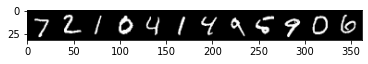

GroundTruth
    7   2   1   0   4   1   4   9   5   9   0   6
tensor([[ -1.7960,   0.7329,   4.2653,   4.4701,  -7.4855,  -5.5136, -18.8517,
          18.2235,  -2.6557,   7.5436],
        [  0.7345,   4.5833,  18.2220,   7.1513, -19.6714,  -5.5176,  -1.8099,
          -1.8015,   7.6036, -13.7084],
        [ -9.3885,  11.6817,   2.2062,  -3.1894,   2.9344,  -5.0386,  -0.8801,
           3.0267,   1.3398,  -4.2099],
        [ 12.5791,  -7.5975,   5.2397,  -4.4179,  -8.7111,   0.0721,   1.1939,
           4.0182,  -2.0977,  -1.7283],
        [ -3.5919,  -2.3994,  -3.3238,  -8.1544,  14.1710,  -2.8876,  -2.5960,
           2.1772,  -1.5530,   8.0987],
        [-11.9076,  14.1655,   2.5083,  -2.8157,   4.5880,  -7.8884,  -5.6909,
           7.3635,   0.0844,  -1.5226],
        [ -8.6422,  -1.3466,  -9.0180,  -7.0178,  13.6424,   1.3215,  -1.0506,
          -5.6484,   8.0344,   8.4958],
        [ -5.6353,  -1.8670,  -0.1602,   6.7782,  -1.1053,  -1.6341, -14.1965,
           4.0359,   3.933

In [122]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images,nrow=batch_size))
print('GroundTruth')
print("  "+' '.join('%3s' % label.item() for label in labels))

outputs, z1, a1, z2, a2, a3, a4 = model(images)
print(outputs)
_, predicted = torch.max(outputs, 1)
print('Prediction')
print("  "+' '.join('%3s' % label.item() for label in predicted))

In [123]:
n_predict = 0
n_correct = 0

for data in test_loader:
    inputs, labels = data
    outputs, z1, a1, z2, a2, a3, a4 = model(inputs)
    _, predicted = torch.max(outputs, 1)
    
    n_predict += len(predicted)
    n_correct += (labels == predicted).sum()
    
print(f"{n_correct}/{n_predict}")
print(f"Accuracy: {n_correct/n_predict:.3f}")

9783/10000
Accuracy: 0.978


In [124]:
print(outputss.shape)

(600000, 10)


In [125]:

outputss = outputss.numpy()

### **여기부터 plot 그리는 부분!!**

In [126]:
X = outputss[540000:600000]
y = label[540000:600000]

print(f'X.shape : {X.shape}')
print(f'y.shape : {y.shape}')


X.shape : (60000, 10)
y.shape : (60000,)


In [127]:
feat_cols = [f'pixel{i}' for  i in range(X.shape[1])]


In [128]:
df = pd.DataFrame(X, columns=feat_cols)


In [129]:
df['y'] = y
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,y
0,-0.961826,5.209295,15.062655,2.464595,-9.174530,-8.560100,-3.576261,3.653427,2.797364,-9.272411,2
1,-10.402086,2.277917,-8.545082,-6.813670,15.769799,0.539017,-2.158246,-2.522774,3.823633,7.534941,4
2,-10.115840,0.086448,-9.744654,-10.390314,20.805372,-0.393669,-2.934140,-0.673129,2.550663,10.618856,4
3,-5.341489,-1.970241,-5.999319,-6.524378,14.806256,-0.039335,-3.508527,1.675863,-1.630325,9.012948,4
4,-5.031624,-0.233548,-4.131753,-10.589039,16.902802,-2.882523,-0.372188,1.631855,-1.409372,5.965882,4
...,...,...,...,...,...,...,...,...,...,...,...
59995,15.156768,-10.887553,5.311295,-3.835076,-11.355741,1.672660,0.525736,3.335925,-0.775313,-1.108058,0
59996,-6.633127,1.262674,-2.927822,0.585277,0.409607,0.101102,-5.297609,-1.873044,8.276788,4.728741,8
59997,-11.056066,-2.640840,-8.967379,4.559509,6.305317,1.206827,-15.973738,0.669109,7.972237,17.742105,9
59998,-2.253193,1.593684,7.297555,4.256722,-9.202271,-7.724091,-17.048210,14.773107,2.014126,4.633180,7


In [130]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
print(df.shape[0])

60000


In [131]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
print(pca_result.shape)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


(60000, 2)
Explained variation per principal component: [0.3766261 0.2488365]


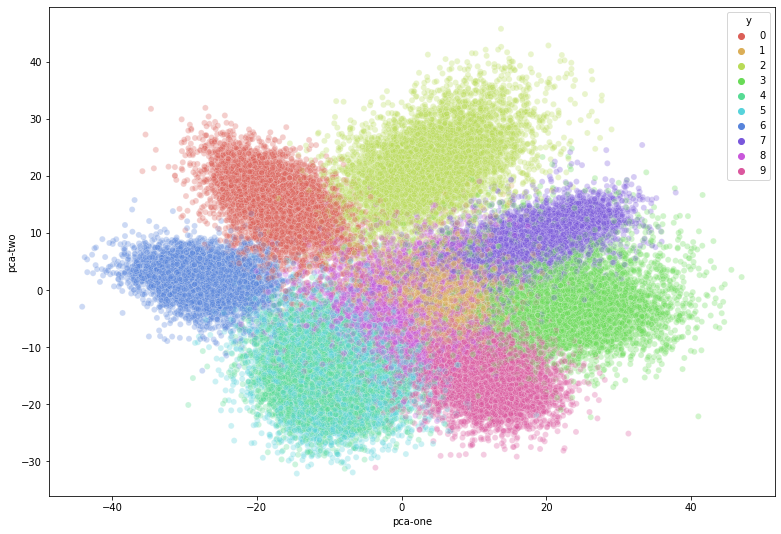

In [132]:
plt.figure(figsize=(13,9))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)
plt.show()

In [133]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.3712373  0.25223038]


In [134]:
time_start = time.time()
tsne = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print('t-SNE done! Time elapsed: {} secpmds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.067s...
[t-SNE] Computed neighbors for 10000 samples in 0.809s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.590382
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.717224
[t-SNE] KL divergence after 300 iterations: 2.436134
t-SNE done! Time elapsed:

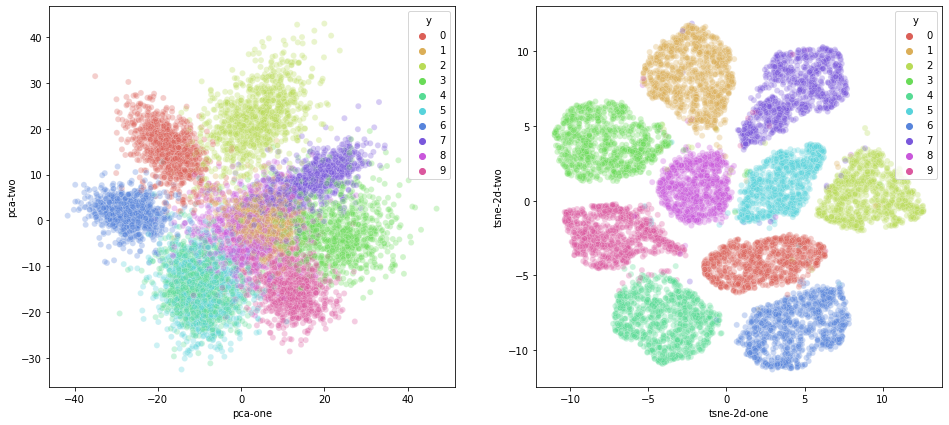

In [135]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)